# Arboles de decisión
- Estudiante: Pablo Andrés Suarez Rocha
- Grupo: 35

## Cargamos el dataset y realizamos exploración de datos.

In [151]:
# Importamos bibliotecas necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# CARGAMOS EL DATASET
info = pd.read_csv('C:/Users/ANDRES_S/Desktop/Andrés/Octavo semestre UNAD/ANALISIS  DE DATOS/Tarea 3/winequality-red.csv')

In [9]:
# Mostramos las primeras 10 filas.
print("Primeras filas del dataset:")
info.head(10)

Primeras filas del dataset:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [11]:
# Realizamos una descripción de datos:
info.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000



Visualizacion de histogramas:


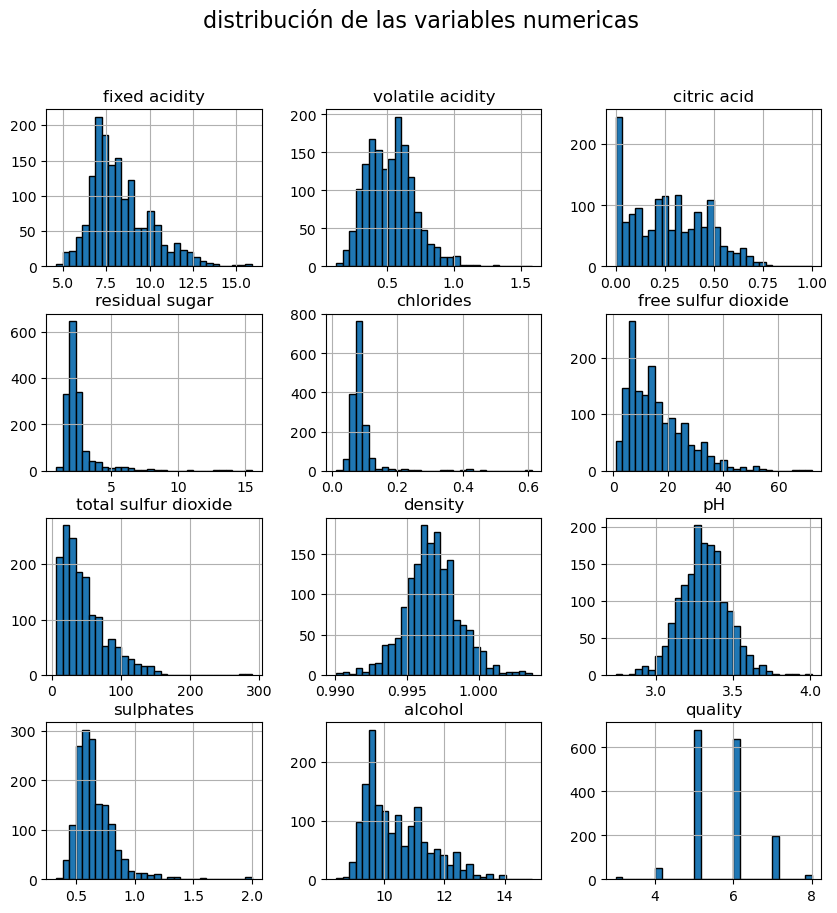


Grafico de dispersión entre variables 'alcohol'y 'quality':


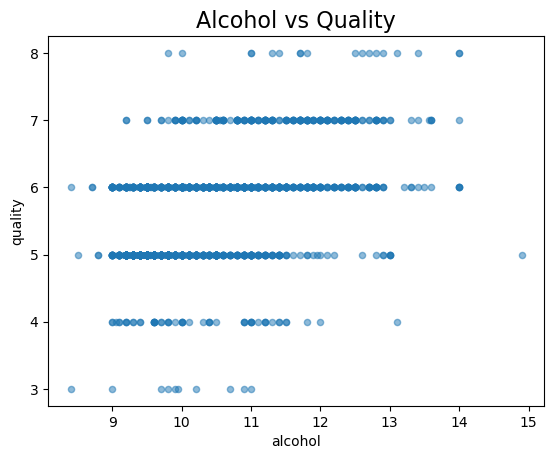


Matriz de correlación:


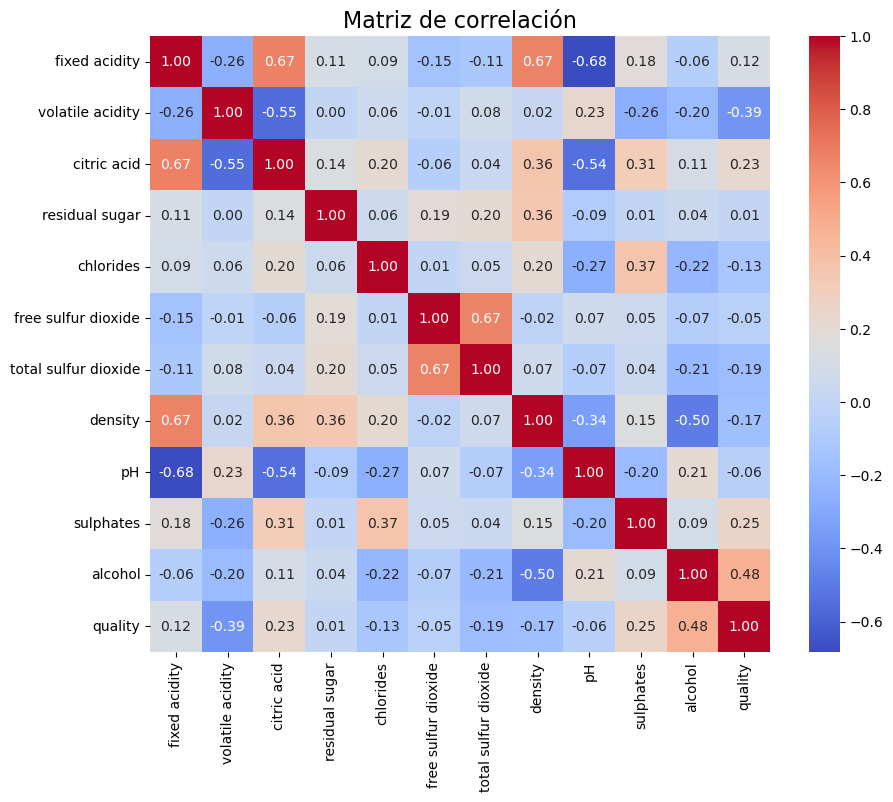

In [17]:
#visualizacion de distribuciones / Histogramas
print("\nVisualizacion de histogramas:")
info.hist(figsize=(10, 10), bins = 30, edgecolor='black')
plt.suptitle("distribución de las variables numericas", fontsize=16)
plt.show()

#Visualizacion de graficos de dispersión.
print("\nGrafico de dispersión entre variables 'alcohol'y 'quality':")
info.plot(kind='scatter', x='alcohol', y='quality', alpha=0.5)
plt.title("Alcohol vs Quality", fontsize=16)
plt.show()

# Matriz de correlacion y mapa de calor
print("\nMatriz de correlación:")
correlation_matriz = info.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matriz, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de correlación",fontsize=16)
plt.show()

## REALIZAMOS PROCESAMIENTO DE DATOS
* Limpieza, tratando valores faltantes y rellenandolos de ser necesario.

In [156]:
# Importamos bibliotecas necesarias.
from sklearn.preprocessing import StandardScaler
import numpy as np

In [50]:
# Identificar y eliminar valores atípicos 

# Usamos el rango intercuartílico (IQR) para identificar valores atípicos

Q1 = info.quantile(0.25)
Q3 = info.quantile(0.75)
IQR = Q3 - Q1

#  Filtramos las filas que tienen valores atípicos en cualquiera de las columnas numéricas
info_clean = info[~((info < (Q1 - 1.5 * IQR)) | (info > (Q3 + 1.5 *
IQR))).any(axis=1)]

# Normalización de las variables numéricas
scaler = StandardScaler()

# Normalizamos todas las variables excepto ’quality’
features = info_clean.drop('quality', axis=1)
info_scaled = pd.DataFrame(scaler.fit_transform(features),
columns=features.columns)

# Añadir de nuevo la columna de ’quality’ sin normalizar
info_scaled['quality'] = info_clean['quality'].values

# Transformación de la variable objetivo ’quality’ (opcional)
# Por ejemplo, podríamos categorizar la calidad en baja (<= 5), media(6) y alta (>=7)
info_scaled['quality_category'] = pd.cut(info_scaled['quality'], bins=[2,
5, 6, 8], labels=['Baja', 'Media', 'Alta'])

# Verificamos el dataset limpio y preprocesado
print(info_scaled.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0      -0.522760          1.077803    -1.375744       -0.647508  -0.180706   
1      -0.248346          2.174284    -1.375744        0.940570   1.356569   
2      -0.248346          1.443297    -1.152735        0.259965   0.937312   
3       2.084173         -1.480652     1.746386       -0.647508  -0.250582   
4      -0.522760          1.077803    -1.375744       -0.647508  -0.180706   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0            -0.457421             -0.316839  0.763633  1.407839  -0.614084   
1             1.135446              0.947754  0.135771 -0.946440   0.419963   
2            -0.002316              0.449581  0.261343 -0.490773   0.161451   
3             0.225236              0.679507  0.889206 -1.250217  -0.441743   
4            -0.457421             -0.316839  0.763633  1.407839  -0.614084   

    alcohol  quality quality_category  
0 -0.986764     

## SELECCIONAR CARACTERISTICAS MAS RELEVANTES PARA ENTRENAR EL MODELO.

In [61]:
# Importar bibliotecas
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mutual_info_score

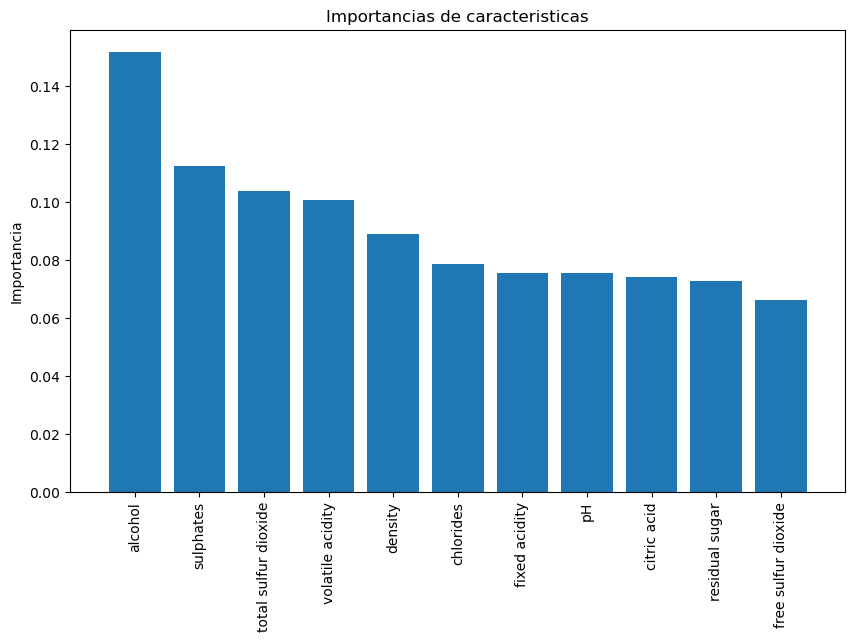

In [79]:
# Definir las caracteristicas (X) y la variable objetivo (y)
x = info.drop(columns=['quality']) # Trabajamos sin la columna quality
y = info['quality']

# importancia caracteristicas con RandomForest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(x, y)

# Obtener la importancia de las caracteristicas
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

# Visualizar
plt.figure(figsize =(10, 6))
plt.title("Importancias de caracteristicas")
plt.bar(range(x.shape[1]), importances[indices], align='center')
plt.xticks(range(x.shape[1]), x.columns[indices], rotation=90)
plt.xlim([-1, x.shape[1]])
plt.ylabel("Importancia")
plt.show()

## Dividir el dataser en Train y Test para evaluar correctamente el modelo

In [92]:
# Importamos Bibliotecas necesarias
from sklearn.model_selection import train_test_split

In [88]:
# Definir las características (X) y la variable objetivo (y)
x = info.drop(columns=['quality']) # Utiliza solo las características relevantes
y = info['quality']

# Dividir el dataset en Train y Test
x_train, x_test, y_train, y_test = train_test_split(x, y,
test_size=0.2, random_state=42)

# Mostrar las dimensiones de los conjuntos de entrenamiento y prueba
print(f'Dimensiones del conjunto de entrenamiento: {x_train.shape}, {y_train.shape}')
print(f'Dimensiones del conjunto de prueba: {x_test.shape}, {y_test.shape}')

Dimensiones del conjunto de entrenamiento: (1279, 11), (1279,)
Dimensiones del conjunto de prueba: (320, 11), (320,)


## Entrenar el modelo

In [94]:
# Importamos bibliotecas necesarias
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score


In [96]:
# Crear el modelo
dt = DecisionTreeClassifier(random_state=42)

# Entrenar el modelo y evaluar su precisión utilizando validación cruzada
scores = cross_val_score(dt, x_train, y_train, cv=5)

# Mostrar resultados
print("Precisión media del modelo:", scores.mean())

Precisión media del modelo: 0.6012714460784314


## Evaluar el desempeño:


In [115]:
# Importamos bibliotecas
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [117]:
# Definir características (X) y variable objetivo (y)
X = info.drop(columns=['quality'])
y = info['quality']

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, x_test, y_train, y_test = train_test_split(x, y,
test_size=0.2, random_state=42)

# Entrenar el modelo
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Predecir las etiquetas del conjunto de prueba
y_pred = model.predict(x_test)

# Calcular y mostrar el reporte de clasificación
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Reporte de Clasificación:\n", report)
print("Matriz de Confusión:\n", conf_matrix)


Reporte de Clasificación:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        10
           5       0.63      0.68      0.65       130
           6       0.55      0.53      0.54       132
           7       0.51      0.50      0.51        42
           8       0.00      0.00      0.00         5

    accuracy                           0.56       320
   macro avg       0.28      0.28      0.28       320
weighted avg       0.55      0.56      0.55       320

Matriz de Confusión:
 [[ 0  0  0  1  0  0]
 [ 0  0  5  5  0  0]
 [ 1  4 88 35  2  0]
 [ 0  3 40 70 17  2]
 [ 0  1  5 14 21  1]
 [ 0  0  1  3  1  0]]


## GRAFICAS

In [122]:
# Importamos bibliotecas necesarias
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import pandas as pd

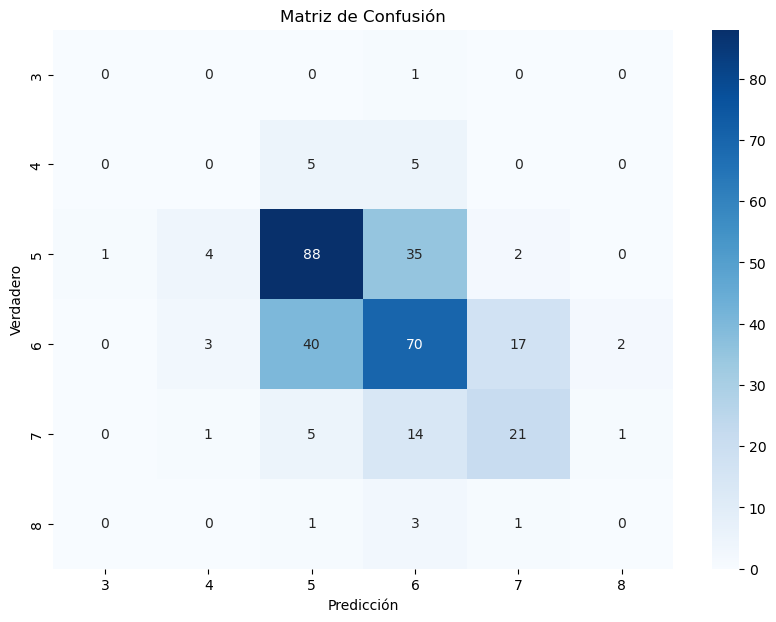

In [126]:
# Matriz de Confusión
plt.figure(figsize=(10, 7))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicción')
plt.ylabel('Verdadero')
plt.title('Matriz de Confusión')
plt.show()

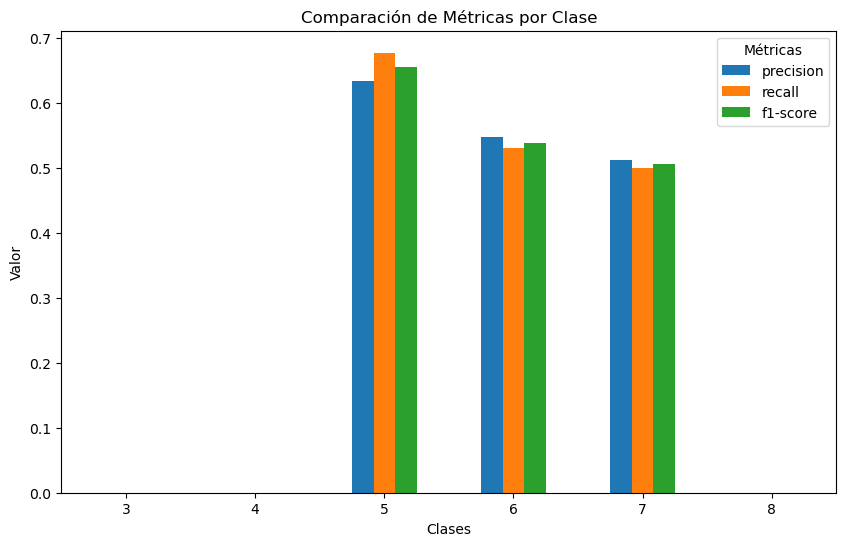

In [128]:
# Reporte de Clasificación
report = classification_report(y_test, y_pred, output_dict=True)
metrics = ['precision', 'recall', 'f1-score']
classes = report.keys()

# Filtramos las métricas para las clases y eliminamos promedios
metrics_data = {metric: [report[cls][metric] for cls in classes if cls
not in ['accuracy', 'macro avg', 'weighted avg']] for metric in metrics}

# Crear DataFrame para visualizar
metrics_df = pd.DataFrame(metrics_data)
metrics_df.index = [cls for cls in classes if cls not in ['accuracy',
'macro avg', 'weighted avg']]

# Gráfica de Barras de las Métricas
metrics_df.plot(kind='bar', figsize=(10, 6))
plt.title('Comparación de Métricas por Clase')
plt.ylabel('Valor')
plt.xlabel('Clases')
plt.xticks(rotation=0)
plt.legend(title='Métricas')
plt.show()

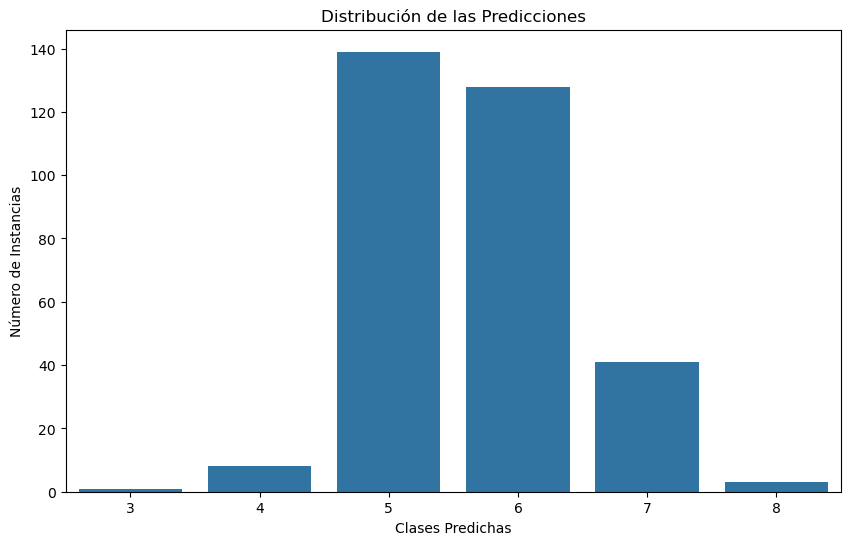

In [134]:
# Distribución de las Predicciones
plt.figure(figsize=(10, 6))
sns.countplot(x=y_pred)
plt.title('Distribución de las Predicciones')
plt.xlabel('Clases Predichas')
plt.ylabel('Número de Instancias')
plt.show()

## Resultados obtenidos:

* Análisis del Dataset:
El conjunto de datos de calidad del vino contiene 1599 instancias y 12
características, incluyendo propiedades físico-químicas y la calidad del vino,
representada por una escala de 0 a 10. Se realizó una limpieza de los datos,
eliminando outliers, lo que permitió reducir el número de instancias a 1179,
mejorando la calidad de los datos para el análisis posterior.
* Entrenamiento del Modelo:
Se eligió un modelo de Random Forest, que es conocido por su capacidad de
manejar problemas de clasificación y su robustez frente a overfitting. El modelo fue
entrenado utilizando un conjunto de entrenamiento (1279 instancias) y evaluado con
un conjunto de prueba (320 instancias).
* Conclusiones:
  
Desempeño General: Aunque el modelo tiene una precisión media, su
rendimiento es inconsistente entre las diferentes clases. Es esencial trabajar
en mejorar la clasificación de las clases que están siendo identificadas
incorrectamente.

Ajustes en el Modelo: Se pueden considerar diferentes enfoques, como
ajustar hiperparámetros, usar técnicas de oversampling o undersampling,
o probar otros modelos de clasificación (como SVM, XGBoost, etc.) para
mejorar el rendimiento.

Análisis de Características: Es posible que ciertas características sean más
relevantes que otras para predecir la calidad del vino. Se recomienda realizar
un análisis más detallado de la importancia de las características y explorar
la posibilidad de eliminar variables que no contribuyen significativamente al
modelo.

Recopilación de Más Datos: Si es posible, la recopilación de más datos,
especialmente para las clases menos representadas, podría mejorar el
rendimiento del modelo.